### Simulation by seed
Using the tournament pairings, assume a complementary linear weighting for win probability. For a matchup of (a,b), a has a probability of b/(a+b) to win.

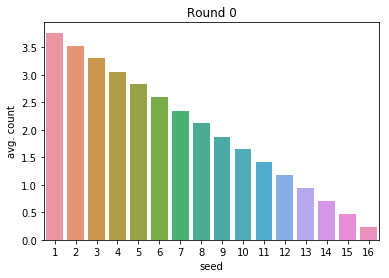

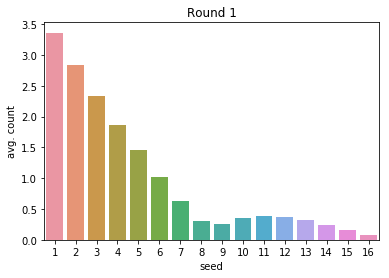

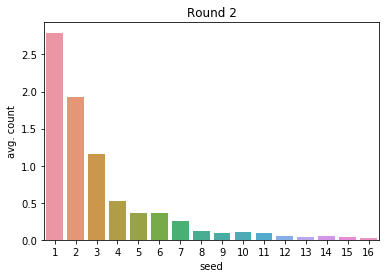

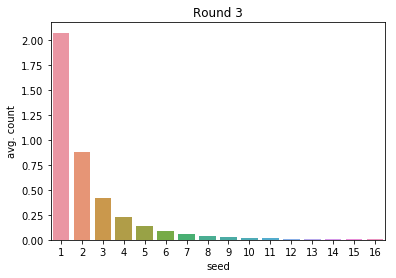

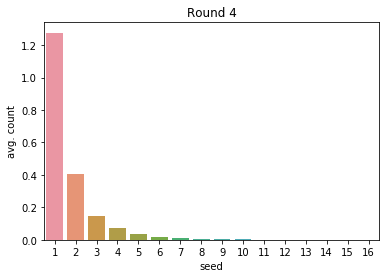

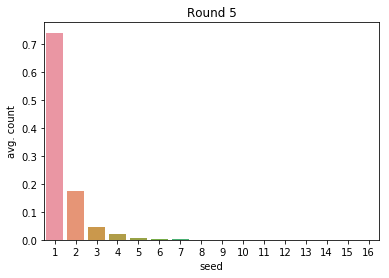

In [1]:
from random import random
from matplotlib import pyplot as plt
import seaborn as sb

pairings=[(1,16),(8,9),(5,12),(4,13),(6,11),(3,14),(7,10),(2,15)]
results=[[0 for x in range(16)] for x in range(6)]

for n in range(10000):
    current=pairings*4
    for rnd in range(6):
        next=[]
        for matchup in current:
            next.append(matchup[random()>(matchup[1]/sum(matchup))])

        for x in next:
            results[rnd][x-1]+=1
        current=[(x,y) for x,y in zip(next[0::2],next[1::2])]
        
for rnd in range(6):
    ax=sb.barplot(x=[x for x in range(1,17)],y=[x/n for x in results[rnd]])
    ax.set(title='Round {}'.format(rnd),xlabel='seed',ylabel='avg. count')
    plt.show()
    plt.figure()